### ***8.1***

![](https://img-blog.csdnimg.cn/20190325192803957.jpg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM3NjkxOTA5,size_16,color_FFFFFF,t_70)

### ***8.2***  对于0/1损失函数来说，指数损失函数并非仅有的一致替代函数

首先，要知道0/1损失函数的一致替代函数的含义。因为0/1损失非凸、非连续，数学性质不好，为了便于计算求解，人们用一些数学性质比较好的函数来替代0/1损失函数。常用的替代函数有指数函数、对数函数、hinge函数。  可参见西瓜书130页的内容。

0/1损失函数原型如下：
![](https://private.codecogs.com/gif.latex?l_%7B0/1%7D%28z%29%3D%5Cleft%5C%7B%5Cbegin%7Bmatrix%7D%201%2C%20%26%20z%3C0%3B%5C%5C0%2C%26%20otherwise%20%5Cend%7Bmatrix%7D%5Cright.)
因此可得，在最小化由 l 损失函数计算得到的整体损失的过程中，已经达到了贝叶斯最优错误率。 可参见西瓜书174页 。 因此即可为0/1损失函数的替代函数。

### ***8.3*** 　AdaBoost集成编程实现

该算法是序列化的串行的集成学习算法，算法的具体步骤见西瓜书 第174页，相关推导过程见 173~177页。此处不再详述。
基于西瓜数据集3.0alpha，采用决策树为基学习器，训练11轮得到最终结果。由于数据量比较小，所以采用的是决策数桩为基学习器。
采用最大信息增益作为划分属性选择的依据，在计算交叉熵时，相较于之前第四章中的做法，这里要计算加权的交叉熵。
另外需要注意一点就是错误率的计算也是要加权进行。                  权重更新一定切记进行规范化操作！！

轮数        	划分属性      	划分点       	何时取1？     	学习器权重     
0         	含糖率       	0.103     	x > V     	0.5893274981708231
1         	含糖率       	0.37      	x > V     	0.7064516300480294
2         	密度        	0.36      	x > V     	0.8175307310769088
3         	含糖率       	0.37      	x > V     	0.7746266083258151
4         	密度        	0.634     	x <= V    	1.4597062854976652
5         	含糖率       	0.37      	x > V     	1.1672442973265686
6         	含糖率       	0.103     	x > V     	1.6377001604955963
7         	含糖率       	0.37      	x > V     	1.420324629776465
8         	密度        	0.36      	x > V     	1.6358239934974472
9         	含糖率       	0.37      	x > V     	1.5337020803259964
10        	密度        	0.634     	x <= V    	2.956642239350725

------------------------------------------------------------

集成个数  样本1     样本2     样本3     样本4     样本5     样本6     样本7     样本8     样本9     样本10    样本11    样本12    样本13    样本14    样本15    样本16    样本17    
真实标签  1         1         1         1         1 

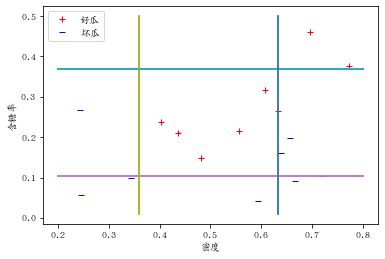

In [8]:
from AdaBoost8_3 import main
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['AR PL UKai CN'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
main()

### ***8.4*** GradientBoosting 和 AdaBoost 的异同

首先，这两种算法都属于 Boosting 算法，思想就是以某种方式在每一个基学习器的训练过程中更加关注在上一轮中训练错误的样本；都是个体学习器之间存在强依赖关系、必须串行生成的序列化方法；均可以将弱学习器提升为强学习器；主要关注于降低偏差，因此可以基于泛化能力非常弱的学习器得出很强的集成。

不同之处在于：AdaBoost 主要是通过增加在上一轮中训练错误样本的权重来达到关注预测错误样本的目的。                                         而 GradientBoosting 是用负梯度来作为上一轮中基学习器犯错的衡量指标，从而在下一轮中通过拟合上一轮中的负梯度来达到纠正上一轮中所犯错误的目的。 这个思想的理论依据就是   函数空间的梯度下降 


### ***8.5*** 编程实现Bagging。

该算法是一个并行的集成学习算法，根据书上算法的描述，首先要进行自助采样，从原始样本集中有放回地选取和初始样本集大小相同的一批样本，然后在抽取的样本上学习得到一个分类器。重复这个过程，得到多个分类器，最终通过简单投票法进行决策。

在自助采样的时候，本人认为既然是有放回地随机抽取，则应该使用均匀分布来产生随机数更准确，而不宜使用正态分布。因此，在最初进行编程时，我的思路是完全按照书上算法的描述使用自助采样抽取样本，抽取的每一个样本权重都一样（也就是样本不带权值），得到的采样样本集里面可能包含多个相同样本，也必然缺少某些样本值。    之后，单纯地使用这个抽取的样本集进行交叉熵、信息增益等的计算，实现决策树分类，得到一个学习器。    然后使用这个学习器在最初始的样本上进行测试。最终用简单投票法实现集成。

[[0.697 0.46]
 [0.343 0.099]
 [0.36 0.37]
 [0.343 0.099]
 [0.481 0.149]
 [0.634 0.264]
 [0.343 0.099]
 [0.697 0.46]
 [0.608 0.318]
 [0.36 0.37]
 [0.697 0.46]
 [0.639 0.161]
 [0.639 0.161]
 [0.774 0.376]
 [0.437 0.211]
 [0.593 0.042]
 [0.639 0.161]]
(18, 2)
[[0.657 0.198]
 [0.657 0.198]
 [0.403 0.237]
 [0.657 0.198]
 [0.437 0.211]
 [0.639 0.161]
 [0.437 0.211]
 [0.556 0.215]
 [0.36 0.37]
 [0.719 0.103]
 [0.437 0.211]
 [0.657 0.198]
 [0.666 0.091]
 [0.403 0.237]
 [0.481 0.149]
 [0.774 0.376]
 [0.481 0.149]]
(18, 2)
[[0.245 0.057]
 [0.343 0.099]
 [0.403 0.237]
 [0.343 0.099]
 [0.608 0.318]
 [0.437 0.211]
 [0.556 0.215]
 [0.343 0.099]
 [0.343 0.099]
 [0.36 0.37]
 [0.593 0.042]
 [0.243 0.267]
 [0.437 0.211]
 [0.657 0.198]
 [0.437 0.211]
 [0.639 0.161]
 [0.403 0.237]]
(18, 2)
[[0.36 0.37]
 [0.556 0.215]
 [0.774 0.376]
 [0.481 0.149]
 [0.556 0.215]
 [0.774 0.376]
 [0.634 0.264]
 [0.639 0.161]
 [0.608 0.318]
 [0.36 0.37]
 [0.608 0.318]
 [0.666 0.091]
 [0.243 0.267]
 [0.343 0.099]
 [0.608 0.318

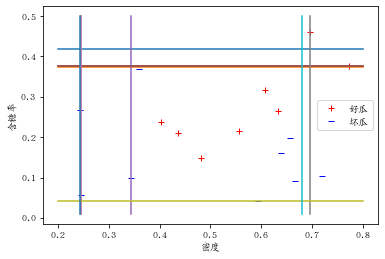

In [7]:
from bagging8_5 import main
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['AR PL UKai CN'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
main()

因此，为了保证划分点的分布均匀性，同时体现出自助采样的效果，最后选择使用带有权重的样本进行训练。     首先，通过自助采样得到一个新的样本集，但是此时不是直接用该样本集进行学习，而是通过该样本集来确定原始数据集中每一个样本的权重（此时多次出现的样本权重较大，没有出现的样本权重为0）。  之后，类似于AdaBoost，使用带权重的所有原数据集进行基学习器的构建，不同之处仅在于AdaBoost是根据上一轮的训练误差来更新样本权值，是串行的；而此处Bagging中每一轮之间没有任何关联，是并行的，它是根据自助采样得到的结果进行样本权重更新。

轮数        	划分属性      	划分点       	何时取1？     
0         	密度        	0.6815    	x > V     
1         	含糖率       	0.126     	x > V     
2         	密度        	0.3815    	x > V     
3         	密度        	0.6615    	x > V     
4         	密度        	0.3815    	x > V     
5         	含糖率       	0.1795    	x > V     
6         	含糖率       	0.126     	x > V     
7         	密度        	0.7465    	x > V     
8         	含糖率       	0.126     	x > V     
9         	含糖率       	0.373     	x > V     
10        	密度        	0.3815    	x > V     

------------------------------------------------------------

集成个数  样本1     样本2     样本3     样本4     样本5     样本6     样本7     样本8     样本9     样本10    样本11    样本12    样本13    样本14    样本15    样本16    样本17    
真实标签  1         1         1         1         1         1         1         1         -1        -1        -1        -1        -1        -1        -1        -1        -1        
1         1         1         -1        -1        -1        -1        -1        -1       

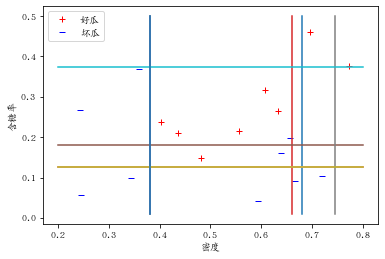

In [9]:
from bagging8_5improve import main
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['AR PL UKai CN'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
main()

可以发现，此时的分类结果相对于之前的结果有一点改善，但是也不是特别精确，都没有AdaBoost方法得到的分类结果好。    这主要是因为AdaBoost主要侧重于降低偏差，所以会根据数据集无限拟合来使分类精度尽可能地高。  而Bagging则侧重于降低方差，所以该方法在特定的数据集上的分类精度往往不能达到很高很高，但是该方法对于数据的扰动不敏感，也就是说当数据产生了一些噪声扰动后，该方法也可以得到不错的分类效果。
当然，由于自助采样的存在，Bagging的结果随机性比较大，多次运行可能得到相差很大的分类结果。 而且，自助采样采用不同的随机数生成方式也会对结果造成影响。个人认为既然是随机取样，使用均匀分布恰当一些，但是也有人使用正态分布、泊松分布等不同方式。使用哪种方式更好或许和原始数据集的分布情况也有关系

### ***8.6***   为何Bagging很难提升朴素贝叶斯分类器的性能？

朴素贝叶斯分类是通过使所有训练样本的后验概率达到最大而进行的，是在全样本集上进行的，从概率意义上说已经是在该特定训练集下的最优分类器。   而Bagging主要侧重于降低方差，但在使用全部训练集样本生成的朴素贝叶斯分类器中没有方差可以降低，不可能通过随机抽样的方法去提升其性能。

### ***8.7 ***  随机森林为何比决策树Bagging的训练速度更快？

因为随机森林除了在样本的选择上是随机抽取一部分外，在划分属性的选择上也是随机选择部分属性进行比较后得到最佳划分属性。但是Bagging是针对所有的属性进行最佳划分属性的选择，所以训练速度会慢

### ***8.8***  MultiBoosting算法和 Iterative Bagging算法的优缺点

MultiBoosting由于集合了Bagging，Wagging，AdaBoost，可以有效的降低误差和方差，特别是误差。但是训练成本和预测成本都会显著增加。 
Iterative Bagging相比Bagging会降低误差，但是方差上升。由于Bagging本身就是一种降低方差的算法，所以Iterative Bagging相当于Bagging与单分类器的折中。


### ***8.10***  提升k近邻分类器性能的集成学习算法。

可以使用Bagging来提升k近邻分类器的性能，每次随机抽样出一个子样本，并训练一个k近邻分类器，对测试样本进行分类。最终取最多的一种分类。